In [1]:
! ls data/

CORD-19-research-challenge     submission.csv
locations_population.csv       test.csv
population_by_country_2020.csv train.csv


In [64]:
import os
import json
import pandas as pd
from tqdm import tqdm
import re
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [80]:
dirs = ["biorxiv_medrxiv", "comm_use_subset", "noncomm_use_subset", "custom_license"]

docs =  []
for d in dirs:
    print(f'Start with {d}')
    for file in tqdm(os.listdir(f"data/CORD-19-research-challenge/{d}/{d}/")):
        if file.endswith(".json"):
            file_path = f"data/CORD-19-research-challenge/{d}/{d}/{file}"
            j = json.load(open(file_path, "rb"))

            title = j["metadata"]['title']
            try:
                abstract = j["abstract"][0]
            except:
                abstract = ""

            full_text = ""
            for text in j["body_text"]:            
                full_text += text['text'] + '\n\n'
            docs.append([title, abstract, full_text])
            

    

 12%|█▏        | 110/886 [00:00<00:00, 1094.03it/s]

Start with biorxiv_medrxiv


  1%|          | 78/9118 [00:00<00:19, 467.94it/s]

Start with comm_use_subset


  7%|▋         | 159/2353 [00:00<00:01, 1588.10it/s]

Start with noncomm_use_subset


  0%|          | 31/16959 [00:00<00:55, 303.65it/s]

Start with custom_license


100%|██████████| 16959/16959 [01:04<00:00, 263.24it/s]


In [69]:
df = pd.DataFrame(docs, columns=['title', 'abstract', 'full_text'])

incubation = df[df['full_text'].str.contains('incubation')]
print(incubation.head())

                                                title  \
1   Time-varying transmission dynamics of Novel Co...   
4   Potential impact of seasonal forcing on a SARS...   
13  A Multiscale and Comparative Model for Recepto...   
20  Real-Time Estimation of the Risk of Death from...   
24  Title Analysis of the epidemic growth of the e...   

                                             abstract  \
1   {'text': 'Rationale: Several studies have esti...   
4   {'text': 'A novel coronavirus (SARS-CoV-2) fir...   
13  {'text': 'The respiratory syndrome caused by a...   
20  {'text': 'The exported cases of 2019 novel cor...   
24  {'text': 'Background: On January 23, 2020, a q...   

                                            full_text  
1   Eighteen years ago, severe acute respiratory s...  
4   (2.2 with 90% high density interval 1.4-3.8 (R...  
13  The coronavirus disease 2019 has emerged at th...  
20  Since 8 December, 2019, clusters of pneumonia ...  
24  On December 31, 2019, the Heal

In [79]:
texts = incubation['full_text'].values

incubation_times = []
for t in texts:
    for sentence in t.split(". "):
        if "incubation" in sentence:
#             single_day = re.findall(r" \d{1,2} day", sentence)
            single_day = re.findall(r" \d{1,2}\.?\d{1,2} day", sentence)

            if len(single_day)== 1:
                num = single_day[0].split(" ")
                if float(num[1]) > 50:
                    print(single_day)
                    print(sentence)
                    print()
                else:
                    incubation_times.append(float(num[1]))   
# print(incubation_times)
print(len(incubation_times))
print(f"The mean projected incubation time is {np.mean(incubation_times)} days")
    


[' 56 day']
An infectious dose for PDCoV and TGEV has not yet been determined in a feed matrix, but soybean meal also had the highest survival for both viruses with a virus concentration of 5.17 log TCID 50 /mL of PDCoV and 4.95 log TCID 50 /mL of TGEV even after 56 days of incubation.

When comparing the inactivation kinetics of each virus, there is a similar trend for soybean meal to have the greatest virus survival

[' 56 day']
Out of the feed ingredients analyzed, soybean meal had greatest delta value in all three viruses, along with the highest concentration of remaining virus after 56 days of incubation

[' 70 day']
monocytogenes are characterised by a long incubation period ranging between 1 and as many as 70 days (average length of 8 days)

[' 56 day']
However,~2 log 10 reduction of viral infectivity was still maintained over 56 days of incubation

[' 90 day']
While robust resistance to the pathogen-targeted AS-136A control emerged rapidly in an approximate 15 to 20-day time wi

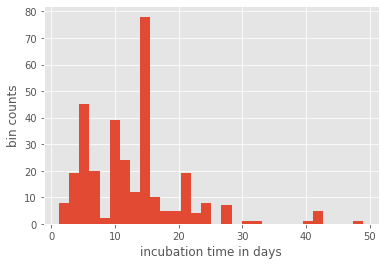

In [78]:
plt.hist(incubation_times, bins=30)
plt.ylabel("bin counts")
plt.xlabel("incubation time in days")
plt.show()